<a href="https://colab.research.google.com/github/Mehranmollanorozi/Text-Classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print(df.head())

  Category                                            Message Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


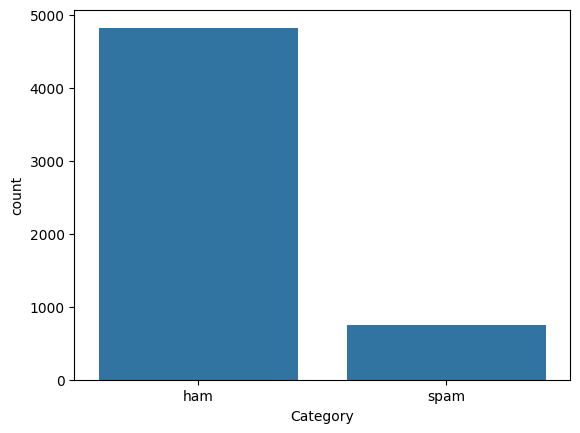

In [ ]:
sns.countplot(x=df["Category"])
plt.show()

In [ ]:
X = df["Message"]
Y = df["Category"]

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)

[[35, 24, 191, 1, 63, 36, 48, 50, 63, 225, 5], [76, 41, 42, 5, 22, 324, 2, 16, 5, 7, 177, 48], [78, 5, 138, 139, 191, 6, 30, 2, 24, 17, 350, 110, 289], [142, 234, 15, 172, 60, 350], [194, 107, 16, 46, 395, 159, 26, 4, 44, 295, 175, 282, 462, 411, 351, 251], [25, 13, 64, 41, 42, 41, 42, 352], [1, 46, 486, 7, 14, 48, 396], [112, 8, 13, 373, 2, 86, 463, 89, 86, 148, 252, 196, 243], [374, 47, 16, 10, 362], [11, 116, 33, 253, 7, 1, 88, 33], [35, 9, 4, 343, 16, 10, 108, 28], [5, 35, 260, 78, 5], [204, 192, 11, 446, 13, 69, 156, 40, 205, 172, 105, 3, 50, 2, 27, 23, 36, 40, 154, 52, 30, 172, 39], [143, 20, 6, 124, 124, 79, 6, 21], [31, 178, 9, 4, 308, 36, 114, 353, 48], [127, 15, 6, 71, 235, 2, 136, 447], [290, 397, 300, 296, 325, 44, 47, 149, 13, 116, 16, 47, 18, 2, 21], [56, 464, 51, 22, 3], [265, 131, 1, 427, 2, 105, 3, 24, 2, 105, 10, 13, 173, 14, 398, 139, 10, 25, 60, 10, 23, 179, 12], [33, 354, 15, 47, 20, 91, 336, 72, 2, 148], [7, 428, 13], [1, 63, 19, 61, 3, 67], [24, 274, 93, 59, 137,

In [ ]:
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)

In [ ]:
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 667ms/step - accuracy: 0.8221 - loss: 0.4843 - val_accuracy: 0.9070 - val_loss: 0.2307
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 650ms/step - accuracy: 0.9469 - loss: 0.2095 - val_accuracy: 0.9742 - val_loss: 0.1022
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 680ms/step - accuracy: 0.9689 - loss: 0.1044 - val_accuracy: 0.9753 - val_loss: 0.0783
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 645ms/step - accuracy: 0.9809 - loss: 0.0694 - val_accuracy: 0.9821 - val_loss: 0.0627
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 699ms/step - accuracy: 0.9858 - loss: 0.0597 - val_accuracy: 0.9865 - val_loss: 0.0572
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 642ms/step - accuracy: 0.9868 - loss: 0.0506 - val_accuracy: 0.9787 - val_loss: 0.0635
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 696ms/step - accuracy: 0.9881 - loss: 0.0408 - val_accuracy: 0.9854 - val_loss: 0.0530
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 651ms/step - accuracy: 0.9899 - loss: 0.0433 - val_accu

In [ ]:
text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

accr = model.evaluate(test_padded, Y_test)
print(accr)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9832 - loss: 0.0675
[0.06808613985776901, 0.9820627570152283]
